In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, '../../aaai18/code/')
from common import *

In [3]:
pred_all = pickle.load(open('./pred_all.pkl', 'r'))
pred_sub_all = pickle.load(open('./pred_sub_all.pkl', 'r'))
pred_sub_agg = pickle.load(open('./pred_sub_agg.pkl', 'r'))
pred_sub_inter = pickle.load(open('./pred_sub_inter.pkl', 'r'))
pred_sub_diff = pickle.load(open('./pred_sub_diff.pkl', 'r'))
pred_sub_union = pickle.load(open('./pred_sub_union.pkl', 'r'))
pred_sub_random = pickle.load(open('./pred_sub_random.pkl', 'r'))
pred_sub_random_2 = pickle.load(open('./pred_sub_random_2.pkl', 'r'))

In [4]:
out_all = pickle.load(open('./out_all.pkl', 'r'))
out_sub_all = pickle.load(open('./out_sub_all.pkl', 'r'))
out_sub_agg = pickle.load(open('./out_sub_agg.pkl', 'r'))
out_sub_inter = pickle.load(open('./out_sub_inter.pkl', 'r'))
out_sub_diff = pickle.load(open('./out_sub_diff.pkl', 'r'))
out_sub_union = pickle.load(open('./out_sub_union.pkl', 'r'))
out_sub_random = pickle.load(open('./out_sub_random.pkl', 'r'))
out_sub_random_2 = pickle.load(open('./out_sub_random_2.pkl', 'r'))

In [5]:
mean_out_all = pd.Panel(out_all).mean(axis=0)
mean_out_sub_all = pd.Panel(out_sub_all).mean(axis=0)
mean_out_sub_agg = pd.Panel(out_sub_agg).mean(axis=0)
mean_out_sub_inter = pd.Panel(out_sub_inter).mean(axis=0)
mean_out_sub_diff = pd.Panel(out_sub_diff).mean(axis=0)
mean_out_sub_union = pd.Panel(out_sub_union).mean(axis=0)

mean_out_sub_random = pd.Panel(out_sub_random).mean(axis=0)
mean_out_sub_random_2 = pd.Panel(out_sub_random_2).mean(axis=0)

          dw    fridge       hvac        mw      oven        wm
10  0.054118  2.739254   9.801759  0.084376  0.091787  0.016656
30  0.053976  2.744887   9.666425  0.083906  0.088240  0.016495
50  0.053858  2.804752  10.002118  0.084957  0.087751  0.016734
70  0.053805  2.770183   9.959759  0.084344  0.087759  0.016535
90  0.053740  2.810304  10.007777  0.085258  0.087630  0.016765


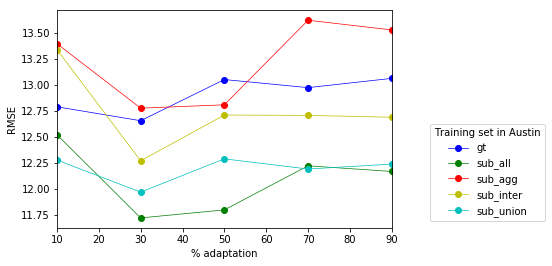

In [11]:
fig, ax = plt.subplots()
error = (pd.DataFrame(mean_out_all)*pd.Series(contri['SanDiego'])).sum(axis=1)
print pd.DataFrame(mean_out_all)*pd.Series(contri['SanDiego'])
error.plot(label='all', marker='o', ax=ax, linewidth=0.7,  color=['b'])
# error.plot(marker='.',ax=ax, legend=False, linewidth=0.6)

error = (pd.DataFrame(mean_out_sub_all)*pd.Series(contri['SanDiego'])).sum(axis=1)
error.plot(label='sub_all',marker='o', ax=ax, linewidth=0.7, color=['g'])
# error.plot(marker='.',ax=ax, legend=False, linewidth=0.6)

error = (pd.DataFrame(mean_out_sub_agg)*pd.Series(contri['SanDiego'])).sum(axis=1)
error.plot(label='sub_agg',marker='o', ax=ax, linewidth=0.7, color=['r'])

error = (pd.DataFrame(mean_out_sub_inter)*pd.Series(contri['SanDiego'])).sum(axis=1)
error.plot(label='sub_inter',marker='o', ax=ax, linewidth=0.7, color=['y'])

# error = (pd.DataFrame(mean_out_sub_diff)*pd.Series(contri['SanDiego'])).sum(axis=1)
# error.plot(label='sub_inter',marker='o', ax=ax, linewidth=0.7, color=['k'])

# error = (pd.DataFrame(mean_out_sub_random)*pd.Series(contri['SanDiego'])).sum(axis=1)
# error.plot(label='sub_inter',marker='o', ax=ax, linewidth=0.7, color=['m'])

error = (pd.DataFrame(mean_out_sub_union)*pd.Series(contri['SanDiego'])).sum(axis=1)
error.plot(label='sub_inter',marker='o', ax=ax, linewidth=0.7, color=['c'])


plt.ylabel("RMSE")
plt.xlabel("% adaptation")
plt.legend(['gt', 'sub_all', 'sub_agg', 'sub_inter', 'sub_union'], loc='best', bbox_to_anchor=(1.1, 0.5), title='Training set in Austin')
plt.savefig("cluster_results_comparison.pdf", format='pdf')

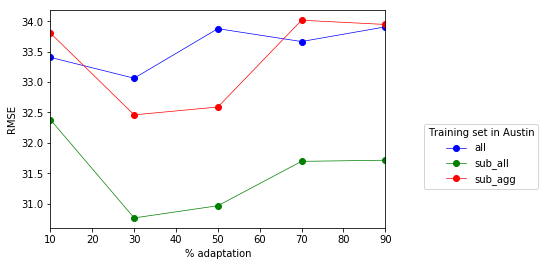

In [9]:
fig, ax = plt.subplots()
error = (pd.DataFrame(mean_out_all)).sum(axis=1)
# print pd.DataFrame(mean_out_all))
error.plot(label='all', marker='o', ax=ax, linewidth=0.7,  color=['b'])
# error.plot(marker='.',ax=ax, legend=False, linewidth=0.6)

error = (pd.DataFrame(mean_out_sub_all)).sum(axis=1)
error.plot(label='sub_all',marker='o', ax=ax, linewidth=0.7, color=['g'])
# error.plot(marker='.',ax=ax, legend=False, linewidth=0.6)

error = (pd.DataFrame(mean_out_sub_agg)).sum(axis=1)
error.plot(label='sub_agg',marker='o', ax=ax, linewidth=0.7, color=['r'])

plt.ylabel("RMSE")
plt.xlabel("% adaptation")
plt.legend(['all', 'sub_all', 'sub_agg'], loc='best', bbox_to_anchor=(1.1, 0.5), title='Training set in Austin')
# plt.savefig("overall_comparison.pdf", format='pdf')